In [1]:
import numpy as np
import scipy.misc as scmisc
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
C = scmisc.imread('lena.tif')
CW = scmisc.imread('embed.tif')

In [3]:
# Create lena_bin.tif by dithering lena.tif
# T is the threshold between values that get re-mapped to 0 or 255
T = 128
u = np.zeros((514,514))
u[1:513, 1:513] = C
CB = np.zeros((514,514))
for n1 in range(1, 513):
    for n2 in range(1,513):
        CB[n1, n2] = 255 if u[n1, n2] >=T else 0
        e = CB[n1, n2] - u[n1, n2]
        u[n1, n2+1] = u[n1, n2+1] - e*(7/16)
        u[n1+1, n2-1] = u[n1+1, n2-1] - e*(3/16)
        u[n1+1, n2] = u[n1+1, n2] - e*(5/16)
        u[n1+1, n2+1] = u[n1+1, n2+1] - e*(1/16)
CB = np.array(CB[1:513, 1:513], dtype=int)

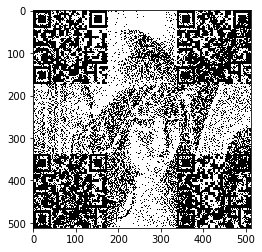

In [4]:
sol = np.bitwise_xor(CB, CW)
imshow(sol, cmap='gray')

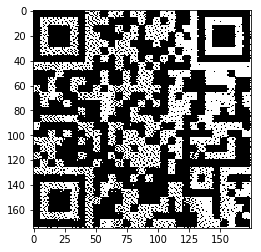

In [5]:
# Crop to the top-left corner so that imshow shows us a bigger QR code for scanning
imshow(sol[0:175, 0:175], cmap='gray')

### Conclusion

Scanning the above QR code gives you the flag: `VolgaCTF{...}`

So there you have it: we've successfully dithered lena.tif using Floyd-Steinberg and applied xor to recover the original flag.

Thanks for reading and thanks to the challenge authors and CTF organizers for putting on another successful event. I'll be looking forward to whatever image challenge the 2019 VolgaCTF brings. :)